# Lab 7: Statistical Methods
### Data Science for Biology
**Notebook developed by:** *Kinsey Long*<br>
**Supervised by:** *Max Staller*<br>

### Learning Outcomes

In this notebook, you will learn about:
* Randomness in Python
* Probability calculations
* Permutation tests and p-values
* Poisson Statistics
* Distributions

---
### Helpful Data Science Resources
Here are some resources you can check out while doing this notebook!

- [Introductory documentation for pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [DS4BIO Pandas Guide](pandas_guide.ipynb)
- [GeeksForGeeks Poisson Distribution](https://www.geeksforgeeks.org/poisson-distribution/#)


### Peer Consulting

If you find yourself having trouble with any content in this notebook, Data Peer Consultants are an excellent resource! Click [here](https://dlab.berkeley.edu/training/frontdesk-info) to locate live help.

Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook, applications of data science in the world, or other data science courses offered at Berkeley.

---

To prepare our notebook environment, run the following cell which imports the necessary packages. It will print `All necessary packages have been imported.` below the cell when it's completed importing.

In [1]:
from datascience import *
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import re
%matplotlib inline
import matplotlib.pyplot as plt
import math

pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("All necessary packages have been imported!")

All necessary packages have been imported!


## 1. Restriction Enzyme Cut Sites

Restriction enzymes are molecular scissors employed in genetic engineering to precisely cut DNA molecules at specific sequences known as cut sites. These enzymes play a crucial role in various molecular biology techniques, such as DNA cloning, gene editing, and DNA fingerprinting. By recognizing and cleaving specific DNA sequences, restriction enzymes enable scientists to manipulate and study genes with a high degree of precision.

In this lab, we will be exploring the quantity and spacing of restriction enzyme recognition sites across different DNA sequences using statistical methods.

### 1.1 GC Content

In this lab, we will be comparing *Saccharomyces cerevisiae* (yeast) and *Homo sapiens* (human) DNA. A reference genome serves as a representative blueprint of a species' genetic material, providing a standardized framework against which individual genomes can be compared and analyzed. These comprehensive maps are invaluable in deciphering the genetic basis of traits, diseases, and evolutionary relationships.


First, run the cell below to import the sequences `human_chr21`, `yeast_chr7`, `e_coli_genome` as strings. These contain the full reference DNA sequences for human chromosome 21, yeast chromosome 7, and the whole reference genome of *Escherichia coli* O157:H7 strain respectively. These sequences can be downloaded from NCBI. You can find various data on the human reference genome [here](https://www.ncbi.nlm.nih.gov/datasets/taxonomy/9606/), data on the yeast reference genome [here](https://www.ncbi.nlm.nih.gov/datasets/taxonomy/4932/) and data of the E. coli reference genome [here](https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_000008865.2/).

In [2]:
#Just run this cell
with open("human_chr21.fasta") as f:
    human_chr21 = f.read().replace("\n", "")

with open("yeast_chr7.fasta") as f:
    yeast_chr7 = f.read().replace("\n", "")

with open("e_coli_genome.fasta") as f:
    e_coli_genome = f.read().replace("\n", "")

print("The first 10 nucleotides of our human DNA are: ", human_chr21[:10])
print("The first 10 nucleotides of our yeast DNA are: ", yeast_chr7[:10])
print("The first 10 nucleotides of our E. coli DNA are: ", e_coli_genome[:10])

print(f"The length of the human chr21 DNA is {len(human_chr21)} nucleotides.")
print(f"The length of the yeast chr7 DNA is {len(yeast_chr7)} nucleotides.")
print(f"The length of the E. coli DNA is {len(e_coli_genome)} nucleotides.")

The first 10 nucleotides of our human DNA are:  NNNNNNNNNN
The first 10 nucleotides of our yeast DNA are:  CCACACCCAC
The first 10 nucleotides of our E. coli DNA are:  AGCTTTTCAT
The length of the human chr21 DNA is 46709983 nucleotides.
The length of the yeast chr7 DNA is 1090940 nucleotides.
The length of the E. coli DNA is 5498578 nucleotides.


Notice that our human DNA contains "N" nucleotides, which indicates that the nucleotide at that position is variable. The sequences are also vastly different in length. In order to conduct our statitical analysis later, let's adjust our strings a little bit.

<font color = #d14d0f>**QUESTION 1**:</font> Set `human_dna` to the first 1,000,000 nucleotides in `human_chr21` that are **not** "N". Set `yeast_dna` to the first 1,000,000 nucleotides in `yeast_chr7` that are **not** "N". Set `e_coli_dna` to the first 1,000,000 nucleotides in `e_coli_genome` that are **not** "N". 

In [3]:
# BEGIN SOLUTION NO PROMPT
human_dna = human_chr21.replace("N", "")[:1000000]
yeast_dna = yeast_chr7.replace("N", "")[:1000000]
e_coli_dna = e_coli_genome.replace("N", "")[:1000000]# END SOLUTION
""" # BEGIN PROMPT
human_dna = human_chr21.replace(...)[...]
yeast_dna = yeast_chr7.replace(...)[...]
e_coli_dna = e_coli_genome.replace(...)[...]
""" # END PROMPT

# Do not change code below this line
print("The first 10 nucleotides of our selected human DNA are: ", human_dna[:10])
print("The first 10 nucleotides of our selected yeast DNA are: ", yeast_dna[:10])
print("The first 10 nucleotides of our selected E. coli DNA are: ", e_coli_dna[:10])
print(f"The length of the selected human DNA is {len(human_dna)} nucleotides.")
print(f"The length of the selected yeast DNA is {len(yeast_dna)} nucleotides.")
print(f"The length of the selected E. coli DNA is {len(e_coli_dna)} nucleotides.")


The first 10 nucleotides of our selected human DNA are:  GATCCACCCG
The first 10 nucleotides of our selected yeast DNA are:  CCACACCCAC
The first 10 nucleotides of our selected E. coli DNA are:  AGCTTTTCAT
The length of the selected human DNA is 1000000 nucleotides.
The length of the selected yeast DNA is 1000000 nucleotides.
The length of the selected E. coli DNA is 1000000 nucleotides.


In [4]:
type(human_dna) == str and type(yeast_dna) == str and type(e_coli_dna) == str

True

In [5]:
human_dna.count("N") + yeast_dna.count("N") + e_coli_dna.count("N")

0

In [6]:
# HIDDEN
all([human_dna[len(human_dna)//5000: len(human_dna)//4800] == "TGTCTTCT", yeast_dna[len(yeast_dna)//5000: len(yeast_dna)//4800] == 'TTACCCTC', e_coli_dna[len(e_coli_dna)//5000: len(e_coli_dna)//4800] == "TAGCACCA"])

True

<font color = #d14d0f>**QUESTION 2**:</font> Build the function `GC_proportion` which calculates the GC content of an input DNA sequence as a proportion, **rounded to 3 decimal places**.
> Hint: You can use `string1.count(string2)` to count the number of occurances of `string2` within `string1`.

In [7]:
# BEGIN SOLUTION NO PROMPT
def GC_proportion(sequence):
    gc_count = sequence.count("G") + sequence.count("C")
    return np.round(gc_count/len(sequence), 3) # END SOLUTION

""" # BEGIN PROMPT
def GC_proportion(sequence):
    ...
    return ...
""" # END PROMPT

' # BEGIN PROMPT\ndef GC_proportion(sequence):\n    ...\n    return ...\n'

In [8]:
GC_proportion("AGCG")

0.75

In [9]:
# HIDDEN
GC_proportion("AACCGGCGC") == 0.778

True

The cell below creates a dictionary of the three different sequences we have set-up so far.

In [10]:
#Just run this cell
dna_dict = {"Human": human_dna,
            "Yeast": yeast_dna,
            "E. coli": e_coli_dna
            }

In [11]:
#Just run this cell to compare the GC content of the three sequences
gc_df = pd.DataFrame({"GC content": []})

for dna, sequence in dna_dict.items():
    gc_df.loc[dna] = GC_proportion(sequence)

gc_df

,GC content
Human,0.448
Yeast,0.380
E. coli,0.513


<font color = #d14d0f>**QUESTION 3a**:</font> Fill in the code below to generate a random DNA sequence `random_dna` of length 1,000,000 nucleotides that is equal proportion A, T, C, and G. 

In [12]:
# DO NOT CHANGE THIS LINE:
np.random.seed(42)

# BEGIN SOLUTION NO PROMPT
random_dna = "".join(np.random.choice(["A", "T", "C", "G"], 1000000, p=[1/4, 1/4, 1/4, 1/4]))
 # END SOLUTION

""" # BEGIN PROMPT
random_dna = "".join(np.random.choice(["A", "T", "C", "G"], ..., p=[...]))
""" # END PROMPT

#YOUR CODE HERE
print("The first 10 nucleotides of our random DNA are: ", random_dna[:10])

The first 10 nucleotides of our random DNA are:  TGCCAAAGCC


In [13]:
type(random_dna) == str

True

In [14]:
random_dna[:50]

'TGCCAAAGCCAGGAAATCTTCATTTGACCACAAGGGTACTATAGTCTCCA'

In [15]:
len(random_dna)

1000000

<font color = #d14d0f>**QUESTION 3b**:</font> Build a function `generate_random_DNA` which takes in an input `GC_content` as a proportion, and generates a random DNA sequence of length 1,000,000 nucleotides with nucleotide frequencies determined from the input `GC_content`.
> Hint:
> - If you aren't sure how to determine the nucleotide frequencies/probabilities from only the GC content, consider Chargaff's Rules.
> - Ignore the `seed` parameter. It is used to help reproduce random sequences, making it easier to check student's work! You can learn more about it [here.](https://www.geeksforgeeks.org/random-seed-in-python/)

In [16]:
# BEGIN SOLUTION NO PROMPT
def generate_random_DNA(GC_content, seed):
    np.random.seed(seed) #DO NOT CHANGE THIS LINE!
    #YOUR CODE HERE
    AT_content = 1 - GC_content
    random_dna = "".join(np.random.choice(["A", "T", "C", "G"], 1000000, p=[AT_content/2, AT_content/2, GC_content/2, GC_content/2]))
    return random_dna
 # END SOLUTION

""" # BEGIN PROMPT
def generate_random_DNA(GC_content, seed):
    np.random.seed(seed) #DO NOT CHANGE THIS LINE!
    #YOUR CODE HERE
    AT_content = ...
    random_dna = ...
    return ...
""" # END PROMPT

' # BEGIN PROMPT\ndef generate_random_DNA(GC_content, seed):\n    np.random.seed(seed) #DO NOT CHANGE THIS LINE!\n    #YOUR CODE HERE\n    AT_content = ...\n    random_dna = ...\n    return ...\n'

In [17]:
generate_random_DNA(0.5, 123)[:10]

'CTACCTGCTT'

In [18]:
generate_random_DNA(0.3, 123).count("A")

349719

In [19]:
len(generate_random_DNA(0.75, 46920))

1000000

<font color = #d14d0f>**QUESTION 3c**:</font> Use `generate_random_DNA` to generate three random DNA sequences: `random_human`, `random_yeast` and `random_ecoli`. Each sequence should have the same GC content as their real sequence counterparts, shown in `gc_df`. Do not change the `seed`!


In [20]:
# BEGIN SOLUTION NO PROMPT
random_human = generate_random_DNA(0.448, 10)
random_yeast = generate_random_DNA(0.380, 11)
random_ecoli = generate_random_DNA(0.513, 12)
# END SOLUTION

""" # BEGIN PROMPT
random_human = generate_random_DNA(..., 10)
random_yeast = generate_random_DNA(..., 11)
random_ecoli = generate_random_DNA(..., 12)
""" # END PROMPT

# Do not change code below this line
print("The first 10 nucleotides of our random human DNA are: ", random_human[:10])
print("The first 10 nucleotides of our random yeast DNA are: ", random_yeast[:10])
print("The first 10 nucleotides of our random E. coli DNA are: ", random_ecoli[:10])

The first 10 nucleotides of our random human DNA are:  CACCTAACAA
The first 10 nucleotides of our random yeast DNA are:  AATCTTATGG
The first 10 nucleotides of our random E. coli DNA are:  ACTCAGGAGA


In [21]:
random_human[:10] + random_yeast[:10] + random_ecoli[:10]

'CACCTAACAAAATCTTATGGACTCAGGAGA'

In [22]:
len(random_human) + len(random_yeast) + len(random_ecoli)

3000000

### 1.2 Counting Restriction Enzyme Binding Sites

Now, let's take a look at the recognition sequences of some restriction enzymes. These are the sequences that the restriction enzyme will recognize and bind to, allowing it to make a cut in the DNA. You can find more information on specific restriction enzymes [here](https://enzymefinder.neb.com/#!#nebheader).

In [23]:
#Just run this cell to load our restriction enzymes
restriction_enzymes_df = pd.DataFrame({
    "Enzyme": ["MluCI", "HaeIII", "HpyCH4IV", "MfeI", "EagI-HF®", "ZraI", "BssSI-v2", "PacI", "NotI"],
    "Recognition Sequence": ["AATT", "GGCC", "ACGT", "CAATTG", "CGGCCG", "GACGTC", "CACGAG", "TTAATTAA", "GCGGCCGC"]
})

restriction_enzymes_dict = restriction_enzymes_df.to_dict       #Creates a dictionary equivalent of this DataFrame

restriction_enzymes_df

,Enzyme,Recognition Sequence
0,MluCI,AATT
1,HaeIII,GGCC
2,HpyCH4IV,ACGT
3,MfeI,CAATTG
4,EagI-HF®,CGGCCG
5,ZraI,GACGTC
6,BssSI-v2,CACGAG
7,PacI,TTAATTAA
8,NotI,GCGGCCGC


<font color = #d14d0f>**QUESTION 4a**:</font> Build the function `count_seq` which returns the number of occurances of a binding recognition seq, `target_seq`, in a DNA sequence, `DNA`.

In [24]:
# BEGIN SOLUTION NO PROMPT
def count_seq(DNA, target_seq):
    return DNA.count(target_seq)
# END SOLUTION

""" # BEGIN PROMPT
def count_seq(DNA, target_seq):
    return ...
""" # END PROMPT

' # BEGIN PROMPT\ndef count_seq(DNA, target_seq):\n    return ...\n'

In [25]:
count_seq("AAATTTAAATTT", "AAA") == 2

True

In [26]:
# HIDDEN
count_seq(human_chr21, "AAAAAAAAAAAA")

4285

<font color = #d14d0f>**QUESTION 4b**:</font> Build the function `theoretical_count` which returns the expectation value for the number of occurances of a binding recognition seq, `target_seq`, in a DNA sequence with `DNA_length` number of nucleotides. Ensure that it outputs a whole number. Assume that each DNA nucleotide is equally likely to be observed.
> Guiding questions:
> - What is the probability of observing a target sequence at the start of the DNA sequence? 
> - What about at the second position of the DNA sequence?
> - How many different locations is it possible to observe a match?
> - How does this affect the expected number of occurances?

In [27]:
# BEGIN SOLUTION NO PROMPT
def theoretical_count(DNA_length, target_seq):
    match_probability =  (1/4) ** len(target_seq)
    expected_num_matches = match_probability * (DNA_length - len(target_seq) + 1)
    return np.round(expected_num_matches, 0)
# END SOLUTION

""" # BEGIN PROMPT
def theoretical_count(DNA_length, target_seq):
    match_probability =  ... ** ...
    expected_num_matches = ... * ...
    return ...
""" # END PROMPT

' # BEGIN PROMPT\ndef theoretical_count(DNA_length, cut_seq):\n    match_probability = ...\n    expected_num_matches = ... * ...\n    return ...\n'

In [28]:
np.random.seed(10)
theoretical_count(np.random.choice(range(10, 1000000), 1)[0], "ACGTA") == 337


True

In [29]:
np.random.seed(10)
theoretical_count(np.random.choice(range(1000, 1000000), 1)[0], "GC") == 21647

True

<font color = #d14d0f>**QUESTION 4c**:</font> Create a new DataFrame, `re_frequencies` with the following columns, in order: 
- `"Enzyme"`: str, the name of the restriction enzyme.
- `"Recognition Sequence"`: str, the binding recognition sequence for the enzyme.
- `"Expected Count"`: int, the expected value of observing the recognition sequence in a random DNA sequence of length 1,000,000.
- `"Actual Count Human"`: int, the actual number of recognitition sequence matches in `human_dna`.
- `"Actual Count Yeast"`: int, the actual number of recognitition sequence matches in `yeast_dna`.
- `"Actual Count E. coli"`: int, the actual number of recognitition sequence matches in `e_coli_dna`.
- `"Actual Count Random"`: int, the actual number of recognitition sequence matches in `random_dna`.

In [30]:
# BEGIN SOLUTION NO PROMPT
expected_counts = []
actual_counts_human = []
actual_counts_yeast = []
actual_counts_e_coli = []
actual_counts_random = []

for target_seq in restriction_enzymes_df["Recognition Sequence"]:
    expected_counts.append(theoretical_count(1000000, target_seq))
    actual_counts_human.append(count_seq(human_dna, target_seq))
    actual_counts_yeast.append(count_seq(yeast_dna, target_seq))
    actual_counts_e_coli.append(count_seq(e_coli_dna, target_seq))
    actual_counts_random.append(count_seq(random_dna, target_seq))

re_frequencies = restriction_enzymes_df.copy()
re_frequencies["Expected Count"] = expected_counts
re_frequencies["Actual Count Human"] = actual_counts_human
re_frequencies["Actual Count Yeast"] = actual_counts_yeast
re_frequencies["Actual Count E. coli"] = actual_counts_e_coli
re_frequencies["Actual Count Random"] = actual_counts_random

re_frequencies
# END SOLUTION

""" # BEGIN PROMPT
expected_counts = ...
actual_counts_human = ...
actual_counts_yeast = ...
actual_counts_random = ...

for target_seq in restriction_enzymes_df["Recognition Sequence"]:
    expected_counts.append(...)
    actual_counts_human.append(...)
    actual_counts_yeast.append(...)
    actual_counts_random.append(...)

re_frequencies = restriction_enzymes_df.copy()
...

re_frequencies
""" # END PROMPT

' # BEGIN PROMPT\nexpected_counts = ...\nactual_counts_human = ...\nactual_counts_yeast = ...\nactual_counts_random = ...\n\nfor target_seq in restriction_enzymes_df["Recognition Sequence"]:\n    expected_counts.append(...)\n    actual_counts_human.append(...)\n    actual_counts_yeast.append(...)\n    actual_counts_random.append(...)\n\nre_frequencies = restriction_enzymes_df.copy()\n...\n\nre_frequencies\n'

In [31]:
re_frequencies.shape

(9, 7)

In [32]:
" ".join(re_frequencies.columns.to_list())

'Enzyme Recognition Sequence Expected Count Actual Count Human Actual Count Yeast Actual Count E. coli Actual Count Random'

In [33]:
1400 < np.mean(re_frequencies["Expected Count"]) < 1420

True

In [34]:
1290 < np.mean(re_frequencies["Actual Count Human"]) < 1300

True

In [35]:
# HIDDEN
" ".join(sorted(re_frequencies["Enzyme"].to_list() + re_frequencies["Recognition Sequence"].to_list()))

'AATT ACGT BssSI-v2 CAATTG CACGAG CGGCCG EagI-HF® GACGTC GCGGCCGC GGCC HaeIII HpyCH4IV MfeI MluCI NotI PacI TTAATTAA ZraI'

In [36]:
# HIDDEN
1160 < np.mean(re_frequencies["Actual Count E. coli"]) < 1168

True

In [37]:
# HIDDEN
1570 < np.mean(re_frequencies["Actual Count Yeast"]) < 1575

True

In [38]:
# HIDDEN
1400 < np.mean(re_frequencies["Actual Count Random"]) < 1408

True

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 4d**:</font> Compare the expected count and actual counts for each DNA sequence.

**ANSWER:** Double-click to write your response here.

<mark> SOLUTION: </mark> The expected count is only close to the random count DNA, but is often very far off from the human, yeast and E.coli real DNA. This indicates that the real DNA sequences are not random sequences with equal A, T, C, G proportions, and instead may have meaningful patterns in the sequence.

<!-- END QUESTION -->

### 1.3 Accounting for GC Bias

One explanation for the observed results above is that we assumed the DNA nucleotide frequencies were equal in our expectation value calculation. This may not be the case for human and yeast DNA. Therefore, it may be useful to account for bias in nucleotide frequency in our theoretical count function.

<font color = #d14d0f>**QUESTION 5a**:</font> Build the function `theoretical_count_with_GC` which returns the expectation value for the number of occurances of a binding recognition seq, `target_seq`, in a DNA sequence with `DNA_length` number of nucleotides, incorporating DNA nucleotide frequency information from the `DNA_GC_proportion` of the input DNA. Ensure that it outputs a whole number. 
> Hint: <br>
> - What is the probability of observing the sequence "ATCG" if the probability of each nucleotide is different?
> - If you aren't sure how to determine the nucleotide frequencies/probabilities from only the GC content, consider Chargaff's Rules.

In [39]:
# BEGIN SOLUTION NO PROMPT
def theoretical_count_with_GC(DNA_length, target_seq, DNA_GC_proportion):
    at_count_of_target, gc_count_of_target = target_seq.count("A") + target_seq.count("T"), target_seq.count("C") + target_seq.count("G")
    DNA_AT_proportion = 1 - DNA_GC_proportion
    match_probability = (DNA_AT_proportion/2) ** at_count_of_target * (DNA_GC_proportion/2) ** gc_count_of_target
    expected_num_matches = match_probability * (DNA_length - len(target_seq) + 1)
    return np.round(expected_num_matches, 0)
# END SOLUTION

""" # BEGIN PROMPT
def theoretical_count_with_GC(DNA_length, target_seq, DNA_GC_proportion):
    at_count_of_target, cg_count_of_target = ..., ...
    DNA_AT_proportion = ...
    match_probability = ...
    expected_num_matches = ... * ...
    return ...
""" # END PROMPT

' # BEGIN PROMPT\ndef theoretical_count_with_GC(DNA_length, target_seq, DNA_GC_proportion):\n    at_count_of_target, cg_count_of_target = ..., ...\n    DNA_AT_proportion = ...\n    match_probability = ...\n    expected_num_matches = ... * ...\n    return ...\n'

In [40]:
theoretical_count_with_GC(4, "A", 0.5)

1.0

In [41]:
theoretical_count_with_GC(10, "A", 0.6)

2.0

In [42]:
# HIDDEN
theoretical_count_with_GC(1000, "AT", 0.8)

10.0

In [43]:
# HIDDEN
all([theoretical_count_with_GC(16000, "AAA", 0.5) == 250, theoretical_count_with_GC(5000, "AATT", 0.2) == 128, theoretical_count_with_GC(50000, "GGTTA", 0.8) == 8])

True

<font color = #d14d0f>**QUESTION 5b**:</font> Create a new DataFrame, `re_frequencies_GC` with the following columns, in order: 
- `"Enzyme"`: str, the name of the restriction enzyme.
- `"Recognition Sequence"`: str, the binding recognition sequence for the enzyme.
- `"Expected Count Human"`: int, the expected value of observing the recognition sequence in `human_DNA`.
- `"Actual Count Human"`: int, the actual number of recognitition sequence matches in `human_dna`.
- `"Expected Count Yeast"`: int, the expected value of observing the recognition sequence in `yeast_DNA`.
- `"Actual Count Yeast"`: int, the actual number of recognitition sequence matches in `yeast_dna`.
- `"Expected Count E. coli"`: int, the expected value of observing the recognition sequence in `e_coli_DNA`.
- `"Actual Count E. coli"`: int, the actual number of recognitition sequence matches in `e_coli_DNA`.

In [44]:
# BEGIN SOLUTION NO PROMPT
expected_counts_GC_human = []
expected_counts_GC_yeast = []
expected_counts_GC_e_coli = []

GC_content_human = gc_df["GC content"]["Human"]
GC_content_yeast = gc_df["GC content"]["Yeast"]
GC_content_e_coli = gc_df["GC content"]["E. coli"]

for target_seq in restriction_enzymes_df["Recognition Sequence"]:
    expected_counts_GC_human.append(theoretical_count_with_GC(1000000, target_seq, GC_content_human))
    expected_counts_GC_yeast.append(theoretical_count_with_GC(1000000, target_seq, GC_content_yeast))
    expected_counts_GC_e_coli.append(theoretical_count_with_GC(1000000, target_seq, GC_content_e_coli))

re_frequencies_GC = restriction_enzymes_df.copy()
re_frequencies_GC["Expected Count Human"] = expected_counts_GC_human
re_frequencies_GC["Actual Count Human"] = actual_counts_human
re_frequencies_GC["Expected Count Yeast"] = expected_counts_GC_yeast
re_frequencies_GC["Actual Count Yeast"] = actual_counts_yeast
re_frequencies_GC["Expected Count E. coli"] = expected_counts_GC_e_coli
re_frequencies_GC["Actual Count E. coli"] = actual_counts_e_coli
# END SOLUTION

""" # BEGIN PROMPT
expected_counts_GC_human = ...
expected_counts_GC_yeast = ...
expected_counts_GC_e_coli = ...

for target_seq in restriction_enzymes_df["Recognition Sequence"]:
    expected_counts_GC_human.append(...)
    expected_counts_GC_yeast.append(...)
    expected_counts_GC_e_coli.append(...)

re_frequencies_GC = restriction_enzymes_df.copy()
re_frequencies_GC["Expected Count Human"] = ...
re_frequencies_GC["Actual Count Human"] = ...
re_frequencies_GC["Expected Count Yeast"] = ...
re_frequencies_GC["Actual Count Yeast"] = ...
re_frequencies_GC["Expected Count E. coli"] = ...
re_frequencies_GC["Actual Count E. coli"] = ...
""" # END PROMPT

re_frequencies_GC

,Enzyme,Recognition Sequence,Expected Count Human,Actual Count Human,Expected Count Yeast,Actual Count Yeast,Expected Count E. coli,Actual Count E. coli
0,MluCI,AATT,5803.0,5645,9235.0,9375,3516.0,4147
1,HaeIII,GGCC,2518.0,4647,1303.0,1535,4329.0,2804
2,HpyCH4IV,ACGT,3822.0,972,3469.0,2458,3901.0,3065
3,MfeI,CAATTG,291.0,182,333.0,520,231.0,193
4,EagI-HF®,CGGCCG,126.0,78,47.0,34,285.0,55
5,ZraI,GACGTC,192.0,61,125.0,101,257.0,136
6,BssSI-v2,CACGAG,192.0,71,125.0,89,257.0,57
7,PacI,TTAATTAA,34.0,21,85.0,35,12.0,26
8,NotI,GCGGCCGC,6.0,6,2.0,4,19.0,4


In [45]:
re_frequencies_GC.shape

(9, 8)

In [46]:
" ".join(sorted(re_frequencies_GC.columns.to_list()))

'Actual Count E. coli Actual Count Human Actual Count Yeast Enzyme Expected Count E. coli Expected Count Human Expected Count Yeast Recognition Sequence'

In [47]:
# HIDDEN
1420 < np.mean(re_frequencies_GC["Expected Count E. coli"]) < 1425

True

In [48]:
# HIDDEN
1440 < np.mean(re_frequencies_GC["Expected Count Human"]) < 1445

True

In [49]:
# HIDDEN
1635 < np.mean(re_frequencies_GC["Expected Count Yeast"]) < 1640

True

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 5d**:</font> Compare the expected count and actual counts for each DNA sequence. In particular, consider the GC content of the recognition sequences and the GC content of the DNA sequences. How do these results compare to the previous DataFrame in Q4c?

**ANSWER:** Double-click to write your response here.

<mark> SOLUTION: </mark> 
- The expected and actual counts are much closer for all three DNA types compared to the previous DataFrame.
- There is not an obvious trend between GC content of species and recognition sequences and their expected vs actual counts. This indicates that real DNA has specific patterns that do not follow a random distribution.

<!-- END QUESTION -->

### 1.4 Hypothesis Testing

In Question 5, we looked at the expected versus actual number of restriction enzyme recognition enzymes. If we want to statistically determine whether this value is different between real human DNA versus random DNA with the same GC content, we could set up a hypothesis test. In this section, we will explore whether the number of MfeI recognition sites is statistically significant in real human DNA compared to random DNA.

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 6a**:</font> Write a null and alternative hypothesis for our hypothesis test.

**ANSWER:**
- Null hypothesis: Double-click to write your response here.
- Alternative hypothesis: Double-click to write your response here.

<mark> SOLUTION: </mark> 
- Null hypothesis: The observed number of MluCI recognition sites ("AATT") in real human DNA is the same as in random DNA with the same GC content. Any variation is due to chance.
- Alternative hypothesis: The observed number of MluCI recognition sites ("AATT") in real human DNA is differnet than in random DNA with the same GC content. Any variation is not due to chance.

<!-- END QUESTION -->

<font color = #d14d0f>**QUESTION 6b**:</font> Now, we want to simulate results under the null hypothesis. Fill in the code below to generate the array `predicted_counts`, which has the counts of MluCI recognition sites for 250 random DNA sequences with the same GC content and length as `human_DNA`. Your code may take around a minute to run.
> Hint: Use your function from Q3c to generate a random DNA sequence with the appropriate GC content.

In [50]:
# BEGIN SOLUTION NO PROMPT
MluCI_recognition_sequence = "AATT"

predicted_counts = []
for i in range(250):
    random_seq = generate_random_DNA(GC_content_human, i)
    count_result = count_seq(random_seq, MluCI_recognition_sequence)
    predicted_counts.append(count_result)
# END SOLUTION

""" # BEGIN PROMPT
MluCI_recognition_sequence = "..."

predicted_counts = []
for i in range(...):
    random_seq = ...(..., i) #DO NOT CHANGE THE SEED, i.
    count_result = ...(..., ...)
    predicted_counts.append(...)
""" # END PROMPT

' # BEGIN PROMPT\nMluCI_recognition_sequence = "..."\n\npredicted_counts = []\nfor i in range(...):\n    random_seq = ...(..., i) #DO NOT CHANGE THE SEED, i.\n    count_result = ...(..., ...)\n    predicted_counts.append(...)\n'

In [51]:
len(predicted_counts)

250

In [52]:
predicted_counts[52]

5928

In [53]:
# HIDDEN
predicted_counts[10:20]

[5814, 5864, 5845, 5907, 5811, 5888, 5833, 5796, 5909, 5747]

<font color = #d14d0f>**QUESTION 6c**:</font> Assign `observed_count` to the number of MluCI recognition sequences in `human_DNA`.

In [54]:
# BEGIN SOLUTION NO PROMPT
observed_count = count_seq(human_dna, MluCI_recognition_sequence)

# END SOLUTION

""" # BEGIN PROMPT
observed_count = ...
""" # END PROMPT

' # BEGIN PROMPT\nobserved_count = ...\n'

Now, just run the cell below to see how the observed result (the number of MluCI recognition sequences in real DNA) compares to the results simulated under the null hypothesis.

Text(0.5, 1.0, 'Number of MluCI Binding Sites in Human DNA vs 250 random sequences of same GC content')

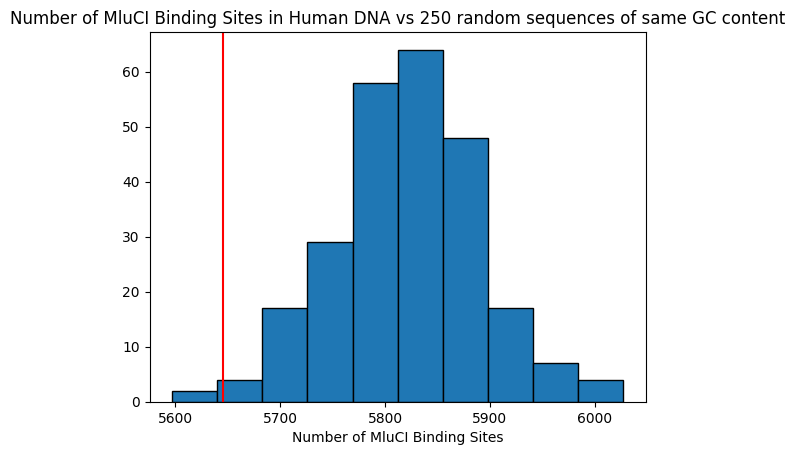

In [55]:
#Just run this cell
plt.hist(predicted_counts, fill=True)
plt.axvline(x = observed_count, color = "red")
plt.xlabel("Number of MluCI Binding Sites")
plt.title("Number of MluCI Binding Sites in Human DNA vs 250 random sequences of same GC content")

In [56]:
5500 < observed_count < 6000

True

In [57]:
# HIDDEN
observed_count

5645

<font color = #d14d0f>**QUESTION 7a**:</font> Calculate the p-value, comparing `observed_count` to `predicted_counts`, and assign it to `p_value`.

In [58]:
# BEGIN SOLUTION NO PROMPT
p_value = sum([1 for i in predicted_counts if i <= observed_count])/len(predicted_counts)
# END SOLUTION

""" # BEGIN PROMPT
p_value = ...
""" # END PROMPT

print(f"The p-value for this hypothesis test is {p_value}.")

The p-value for this hypothesis test is 0.012.


In [59]:
0 < p_value < 1

True

In [60]:
# HIDDEN
np.round(p_value, 3)

0.012

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 7b**:</font> What can we conclude from our results, given a p-value cutoff of 0.05? What about for a p-value of 0.01?

**ANSWER:** DOUBLE-CLICK TO TYPE YOUR RESPONSE HERE.

<mark>SOLUTION:</mark> 
- For a p-value cutoff of 0.05, we can reject the null hypothesis and accept the alternative hypothesis. This means that our observed number of MluCI binding sites in real human DNA is statistically different from random DNA with the same GC content, suggesting that real DNA is organized.
- For a p-value cutoff of 0.01, we would fail to reject the null hypothesis. This means that our observed number of MluCI binding sites in real human DNA is not statistically different from random DNA with the same GC content.

<!-- END QUESTION -->

### 1.4 Poisson Statistics

**The Poisson Probability Distribution** <br>

The Poisson probability distribution is a mathematical concept used to model the probability of a given number of **discrete events** happening in a fixed interval of time or space, under certain conditions. It is particularly useful for **rare events** that occur with a known constant mean rate and independently of the time since the last event. For example, the Poisson distribution can be used to model the number of emails a person receives in an hour or the number of stars appearing in a certain area of the sky. The key parameter of this distribution is λ (lambda), which represents the average number of events in the given interval. The probability of observing exactly k events (where k is a non-negative integer) is calculated using the formula P(X = k) = (λ^k * e^(-λ)) / k!. The mean and variance of this distribution are both equal to λ. 

A common point of confusion arises when students try to decide between using the Poisson distribution and the Gaussian (or normal) distribution. While both distributions can be used in certain contexts, they are fundamentally different. The Gaussian distribution is typically used for continuous data and is most appropriate when dealing with large sample sizes or events that are not rare. In contrast, the Poisson distribution is better suited for rare events with smaller sample sizes. However, it's important to note that as the sample size increases (i.e., in the limit of large N), the Poisson distribution can converge to a Gaussian distribution, which is a key point in understanding the relationship between these two statistical models.

--- 

In this section, we will model the probability of observing a given number of PacI recognition sites ("TTAATTAA") in a random 100,000 nucleotides-long DNA sequence using the Poisson distribution, and then using our model to make probabilistic calculations. Therefore, in our scenario, P(X=2) symbolizes the probability of observing 2 MluCI recognition sites in a DNA sequence of length 100,000 with the same GC content as `human_DNA`. 

<font color = #d14d0f>**QUESTION 8a**:</font> Assign `lambda_constant` to the value of λ for a Poisson probability distribution that models the probability of observing a given number of MluCI recognition sites in a random 100,000 nucleotides-long DNA sequence (with the same GC content as a human).
> Hint: you may want to use a function that you previously built.

In [61]:
# BEGIN SOLUTION NO PROMPT
lambda_constant = theoretical_count_with_GC(100000, "TTAATTAA", GC_content_human)
# END SOLUTION

""" # BEGIN PROMPT
lambda_constant = ...
""" # END PROMPT

print(f"The lambda for our Poission distribution is {lambda_constant}.")

The lambda for our Poission distribution is 3.0.


In [62]:
0 < lambda_constant < 10

True

In [63]:
# HIDDEN
lambda_constant == 3

True

<font color = #d14d0f>**QUESTION 8b**:</font> Assign `observed_count_100000` to the number of PacI recognition sites in the first 100,000 nucleotides of `human_DNA`.

In [64]:
# BEGIN SOLUTION NO PROMPT
observed_count_100000 = count_seq(human_dna[:100000], "TTAATTAA")
# END SOLUTION

""" # BEGIN PROMPT
observed_count_100000 = ...
""" # END PROMPT

print(f"There are {observed_count_100000} PacI recognition sites in the first 100,000 nucleotides of our real human DNA.")

There are 1 MluCl recognition sites in the first 100,000 nucleotides of our real human DNA.


In [65]:
0 < observed_count_100000 < 10

True

In [66]:
# HIDDEN
observed_count_100000 == 1

True

<font color = #d14d0f>**QUESTION 8c**:</font> Use the formula for P(X=k) to calculate the probability of observing exactly `observed_count_100000` number of PacI recognition sites in a random DNA (with the same GC content as human). In other words, calculate P(X = `observed_count_100000`). Assign your results to `p_x_observedcount100000`.
> Hint: `math.e` and `math.factorial(int)` may be useful.

In [67]:
# BEGIN SOLUTION NO PROMPT
p_x_observedcount100000 = (lambda_constant ** observed_count_100000 * math.e ** (-lambda_constant))/math.factorial(observed_count_100000)
# END SOLUTION

""" # BEGIN PROMPT
p_x_observedcount100000 = ...
""" # END PROMPT

print(f"The probability of observed {observed_count_100000} number of PacI binding sites in random DNA of length 100,000 with human GC content is {p_x_observedcount100000}.")

The probability of observed 1 number of PacI binding sites in random DNA of length 100,000 with human GC content is 0.14936120510359185.


In [68]:
0 < p_x_observedcount100000 < 1

True

In [69]:
# HIDDEN
np.round(p_x_observedcount100000, 3) == np.round((lambda_constant ** observed_count_100000 * math.e ** (-lambda_constant))/math.factorial(observed_count_100000), 3)

True

<font color = #d14d0f>**QUESTION 9a**:</font> Fill in the code below to create a list `pmf` (Probability Mass Function), which contains the probability of observing `k` number of PacI recongition sites in random DNA (with the same GC content as human), for up until `k` = 30. In other words, `pmf` should be a list containing P(X=0), P(X=1), P(X=2), and so on.

In [70]:
# BEGIN SOLUTION NO PROMPT
k_values = np.arange(0, 31)
pmf = []
for k in k_values:
    p_x_k = (lambda_constant ** k * math.e ** (-lambda_constant))/math.factorial(k)
    pmf.append(p_x_k)
# END SOLUTION

""" # BEGIN PROMPT
k_values = ...
pmf = []
for k in k_values:
    p_x_k = ...
    pmf.append(...)
""" # END PROMPT

' # BEGIN PROMPT\nk_values = ...\npmf = []\nfor k in k_values:\n    p_x_k = ...\n    pmf.append(...)\n'

In [71]:
len(pmf)

31

In [72]:
all([True for i in pmf if (0 < i < 1)])

True

In [73]:
# HIDDEN
np.round(np.mean(pmf),3) == 0.032

True

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 9b**:</font> Fill in the code below to generate a `sns` scatterplot of the `pmf` (Probability Mass Function) for values of `k` from 0 to 60 (inclusive). 
> Note: the vertical red line is the number of PacI sites in 100,000 nucleotides of real DNA that you determined in Q8b.

Text(0.5, 1.0, 'Poisson Probability Distribution of Observed k Number of Cut Sites in DNA length 5000')

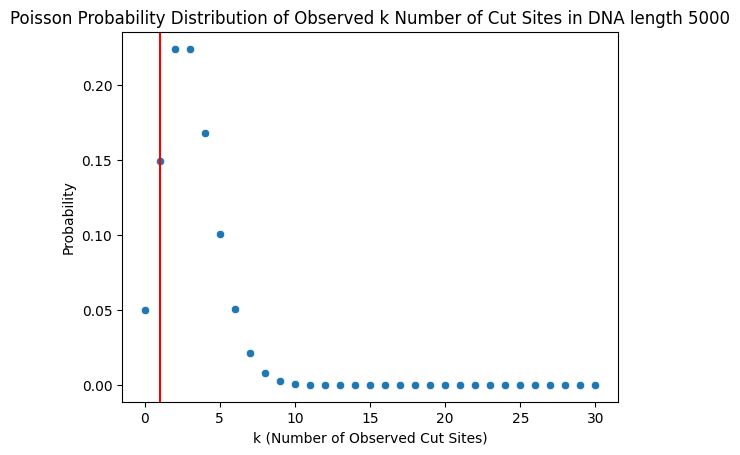

In [74]:
# BEGIN SOLUTION NO PROMPT
ax = sns.scatterplot(x = k_values, y = pmf)
# END SOLUTION

""" # BEGIN PROMPT
ax = sns.scatterplot(...)
""" # END PROMPT

ax.axvline(x = observed_count_100000, color = "red")
ax.set_xlabel("k (Number of Observed Cut Sites)")
ax.set_ylabel("Probability")
ax.set_title("Poisson Probability Distribution of Observed k Number of Cut Sites in DNA length 5000")

<!-- END QUESTION -->

<font color = #d14d0f>**QUESTION 9c**:</font> Calculate the probability of observing at least 8 PacI cut sites. Assign your result to `p_x_atleast8`. 
> Note: assume the P(k>30) is negligible for these questions.

In [75]:
# BEGIN SOLUTION NO PROMPT
p_x_atleast8 = sum(pmf[8:])
# END SOLUTION

""" # BEGIN PROMPT
p_x_atleast8 = ...
""" # END PROMPT

print(f"The probability of observing at least 8 cut sites is {p_x_atleast8}.")

The probability of observing at least 8 cut sites is 0.011904503856357392.


In [76]:
0 < p_x_atleast8 < 1

True

In [77]:
# HIDDEN
np.round(p_x_atleast8, 3) == np.round(sum(pmf[8:]), 3)

True

<font color = #d14d0f>**QUESTION 9d**:</font> Calculate the probability of observing between 5 and 10 (inclusive) PacI cut sites. Assign your result to `p_5_x_10`.

In [78]:
# BEGIN SOLUTION NO PROMPT
p_5_x_10 = sum(pmf[5:]) - sum(pmf[11:])
# END SOLUTION

""" # BEGIN PROMPT
p_5_x_10 = ...
""" # END PROMPT

print(f"The probability of observing between 5 and 10 (inclusive) cut sites is {p_5_x_10}.")

The probability of observing between 5 and 10 (inclusive) cut sites is 0.1844444185255806.


In [79]:
0 < p_5_x_10 < 1

True

In [80]:
# HIDDEN
np.round(p_5_x_10, 3) == np.round(sum(pmf[5:]) - sum(pmf[11:]), 3)

True

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 10**:</font> Explain whether λ must always be discrete for the Poisson distribution. Could the expected number of a cut sites be 1.5? Is it possible to observe 1.5 cut sites? Why?

**ANSWER:** DOUBLE-CLICK TO TYPE YOUR RESPONSE HERE.

<mark>SOLUTION:</mark> 
- The expected value (λ in Poisson) is the long-term average value of a random variable based on its probability distribution. Since it is an average, it does not have to be discrete.
- The expectation value of the number of cut sites does not have to be discrete, so it could be 1.5.
- The actual number of cut sites is a discrete variable, and it can't be 1.5.

<!-- END QUESTION -->

## 2. Fragment Lengths

In this final section, we will be exploring trends in the fragment lengths between restriction enzyme cut sites in DNA. Throughout this section, we will assume that a cut site is made immediately at the end of a restriction enzyme binding site. 

<font color = #d14d0f>**QUESTION 11**:</font> Build a function `fragment_lengths` that takes in a `dna_sequence` and a `cut_site_sequence` and returns a list of the lengths of all possible fragments generated.
> Hint:
> - For example, `fragment_lengths("GGGTTTGGGTTGGG", "GGG")` should output a list like [6, 5, 11] (not necessarily in that order). It has three cut sites **after** each "GGG", highlighted: "GGG<mark>|</mark>TTTGGG<mark>|</mark>TTGGG<mark>|</mark>"
> - `matches` is a list of the indices of the last character of all `cut_site_sequence` matches in the `dna_sequence`.
> - Then, use two for loops to calculate the distances between all possible cut sites. Append each distance to the `lengths` array.
> - You do not have to follow the skeleton code if you have a different approach to this answering this question.

In [81]:
# BEGIN SOLUTION NO PROMPT
def fragment_lengths(dna_sequence, cut_site_sequence):
    matches = [match.end() for match in re.finditer(cut_site_sequence, dna_sequence)]
    lengths = []
    for i in range(len(matches) - 1):
        for j in range(i + 1, len(matches)):
            lengths.append(matches[j] - matches[i])
    return lengths
# END SOLUTION

""" # BEGIN PROMPT
def fragment_lengths(dna_sequence, cut_site_sequence):
    matches = [match.end() for match in re.finditer(cut_site_sequence, dna_sequence)]
    lengths = []
    for i in range(...):
        for j in range(..., ...):
            lengths.append(...)
    return lengths
""" # END PROMPT

' # BEGIN PROMPT\ndef fragment_lengths(dna_sequence, cut_site_sequence):\n    matches = [match.end() for match in re.finditer(cut_site_sequence, dna_sequence)]\n    lengths = []\n    for i in range(...):\n        for j in range(..., ...):\n            lengths.append(...)\n    return lengths\n'

In [82]:
sorted(fragment_lengths("AAATTAAA", "AAA")) == [5]

True

In [83]:
sorted(fragment_lengths("GGGTTTGGGTTGGG", "GGG")) == [5, 6, 11]

True

In [84]:
np.random.seed(20)
len(fragment_lengths("".join(np.random.choice(["A", "T", "C", "G"], 300)), "GG")) == 136

True

In [85]:
np.random.seed(49)
sorted(fragment_lengths("".join(np.random.choice(["A", "T", "C", "G"], 300)), "".join(np.random.choice(["A", "T", "C", "G"], 3)))) == [12, 45, 57, 80, 125, 137]

True

Just run the cell below to generate plots of the distribution of the fragment lengths for each restriction enzyme. It compares the distribution of the fragment lengths for our real human dna and some random DNA with the same GC content. The cell may take up to a minute to run.

Text(0.5, 1.0, 'Distribution of Fragment Lengths')

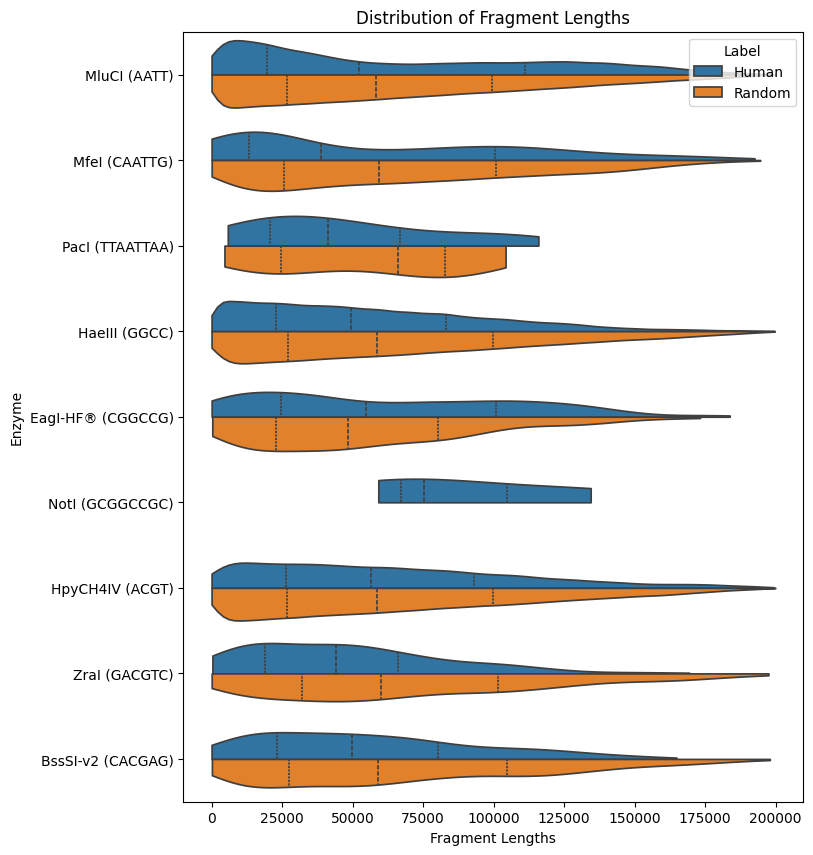

In [86]:
#Just run this cell
enzyme_list = [("MluCI", "AATT"), ("MfeI", "CAATTG"), ("PacI", "TTAATTAA"), ("HaeIII", "GGCC"), ("EagI-HF®", "CGGCCG"), ("NotI", "GCGGCCGC"), ("HpyCH4IV", "ACGT"), ("ZraI", "GACGTC"), ("BssSI-v2", "CACGAG")]

vplot_df = pd.DataFrame({"Enzyme": [], "Label": [], "Fragment Length": []})

for i in range(len(enzyme_list)):
    row = i // 3
    column = i % 3
    enzyme_name, cut_seq = enzyme_list[i]
    fragment_lengths_human = fragment_lengths(human_dna[:200000], cut_seq)
    fragment_lengths_random = fragment_lengths(random_human[:200000], cut_seq)
    fragment_lengths_human_df = pd.DataFrame({"Enzyme": f"{enzyme_name} ({cut_seq})", "Label": "Human", "Fragment Lengths": fragment_lengths_human})
    fragment_lengths_random_df = pd.DataFrame({"Enzyme": f"{enzyme_name} ({cut_seq})", "Label": "Random", "Fragment Lengths": fragment_lengths_random})
    vplot_df = pd.concat([vplot_df, fragment_lengths_human_df, fragment_lengths_random_df])

plt.figure(figsize=(8, 10))
sns.violinplot(data=vplot_df, x="Fragment Lengths", y = "Enzyme", hue="Label", split=True, inner="quart", density_norm="area", cut = 0)
plt.title('Distribution of Fragment Lengths')

<!-- BEGIN QUESTION -->

<font color = #d14d0f>**QUESTION 12**:</font> What kinds of different fragment length distributions do you observe in the histograms above? Do any plots show a significantly different distribution from the human versus random DNA? If so, what is a possible biological explanation for those discrepancies?

**ANSWER:** DOUBLE-CLICK TO TYPE YOUR ANSWER HERE.

<mark>SOLUTION: </mark> 
- There are some poisson-like distributions, some bimodal distributions and some linear.
- There are a few plots (e.g Eagl-HF, Zral) where the human DNA fragments show a bimodal distribution, but the random DNA is unimodal. 
- This suggests that the real human DNA has cut sequences for those enzymes clustered in specific areas, leading to many short fragments and many longer fragments, but fewer middle-length fragments.

***
## 3. Extra Credit Mini-Projects

Most assignments in this course will include optional extra credit questions. These questions are designed as starting points for students to explore more free-form mini projects. Therefore, there is no skeleton code and minimal guidance for these questions. Students are welcome to go beyond the scope of the question or adapt the question as necessary to answer their own scientific questions of interest. You are welcome to create as many coding cells as you would like for these mini-projects. In order to get extra credit, students should make a reasonable attempt (as judged by the grader) on at least one question and write a brief report.

Write a summary on your methodology and your findings, highlighting key results and any interesting observations. The length of the report does not matter, as long as it answers all of the following questions:
- What was your scientific goal with this project?
- What methods did you use and why?
- What were the key results you found for each method you implemented?
- Were there any limitations in your methods?
- What additional observations or comments can you make on your findings? What is the greater biological relevance or implication?
- Are there any additional questions you would want to explore?

<!-- BEGIN QUESTION -->

**Cas9 Targeting**

CRISPR-Cas9, a revolutionary technology for editing genes, operates in a highly targeted manner. During the Cas9 targeting process, the guide RNA and Cas9 protein complex moves along the DNA strand searching for a binding sequence.

As the CRISPR-Cas9 complex moves along the DNA, it looks for the presence of a Protospacer Adjacent Motif (PAM) sequence. This PAM sequence is crucial because it signals the correct location for gene editing. The Cas9 enzyme from Streptococcus pyogenes, for example, recognizes the PAM sequence 'NGG' (where 'N' can be any nucleotide followed by two guanines).

Once the PAM sequence is identified, the Cas9 protein induces a localized unwinding of the DNA helix. This allows the gRNA to bind or anneal to its complementary DNA sequence adjacent to the PAM. The binding is through standard base-pairing rules (A pairs with T, C pairs with G).

After the gRNA successfully pairs with the target DNA sequence next to the PAM, the Cas9 protein activates its nuclease domains. These domains then cleave the DNA, typically cutting both strands, leading to a double-strand break at a precise location in the genome, allowing for gene editing to occur.

You could explore either of these questions using `human_chr21`,`yeast_chr7` and/or `e_coli_genome`. You can also try downloading, importing and reading any other genome from NCBI.

<font color = #d14d0f>**EC Mini-Project A:**</font> What is the statistically expected minimum length of a gRNA target sequence needed in order to bind to only one site in the genome for each species, considering their GC content?

<font color = #d14d0f>**EC Mini-Project B:**</font> Considering the necessity of the PAM sequence and assuming gRNA has a minimum length of 17 and a maximum length of 100 nt (any custom sequence) to bind effectively, what % of DNA (human chr 21, yeast chr 7 and E. coli) is capable of being edited by the Cas9 enzyme from *Streptococcus pyogenes*? 

<font color = #d14d0f>**EC Mini-Project C:**</font> While Cas9 based CRISPR is currently the most popular tool for modifying genomes, other technologies existed before CRISPR, like TALENs and Zinc finger nucleases. Research one of these alternative methods for genome engineering and write a short paragraph comparing and contrasting that method with CRISPR. What are the advantages of each method? What are the disadvantages? This question is intended as an open ended exploration. You may want to investigate gene therapy dimensions and AAV delivery systems, or explore immunogenicity, describe genome target specificity, or describe ease of reagent validation. Please limit your answer to 500 words discussing one or a few contrasts. After exploring the strengths and weaknesses of these different technologies with the members of your group, what is your favorite method? Why?

In [87]:
#YOUR CODE HERE. ADD ADDITIONAL CODE CELLS AS NEEDED.

**EXTRA CREDIT REPORT: [insert project choice here]** <br>

*DOUBLE-CLICK TO EDIT THIS CELL AND TYPE YOUR REPORT*

<!-- END QUESTION -->

---
### Congratulations! You have finished LAB 7!
---